# Stat project 3

Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.


_(поиск аномалий и выбросов)_

## Задания

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

## Описание данных
- timestamp – дата и время (точность до часа)
- cnt – количество аренд велосипедов за этот час
- t1 – температура, в С
- t2 – температура "ощущается как", в С 
- hum – влажность (%)
- wind_speed – скорость ветра, км/ч
- weather_code – погодные условия:
    - 1 – ясно (SKC)
    - 2 – преимущественно ясно / встречаются отдельные облака (SCT)
    - 3 – облачно / значительные облака (BKN)
    - 4 – пасмурно (OVC)
    - 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
    - 10 – дождь с грозой
    - 26 – снегопад 
    - 94 – ледяной туман (да, такое бывает!)
- isholiday – является ли день праздником (1 – праздник, 0 – нет)
- isweekend –  является ли день выходным (1 – выходной, 0 – нет)
- season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# таблица с уникальными идентификаторами пользователей
df = pd.read_csv('./london.csv', parse_dates=['timestamp'])

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [5]:
#размер таблицы
df.shape

(17414, 10)

In [6]:
#кол-во пропусков
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

# Задание 2
Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

- по оси x – дата (timestamp)
- по оси y – число поездок (cnt)
Выберите верные утверждения:

Hint: sns.lineplot

In [7]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

<Axes: xlabel='timestamp', ylabel='cnt'>

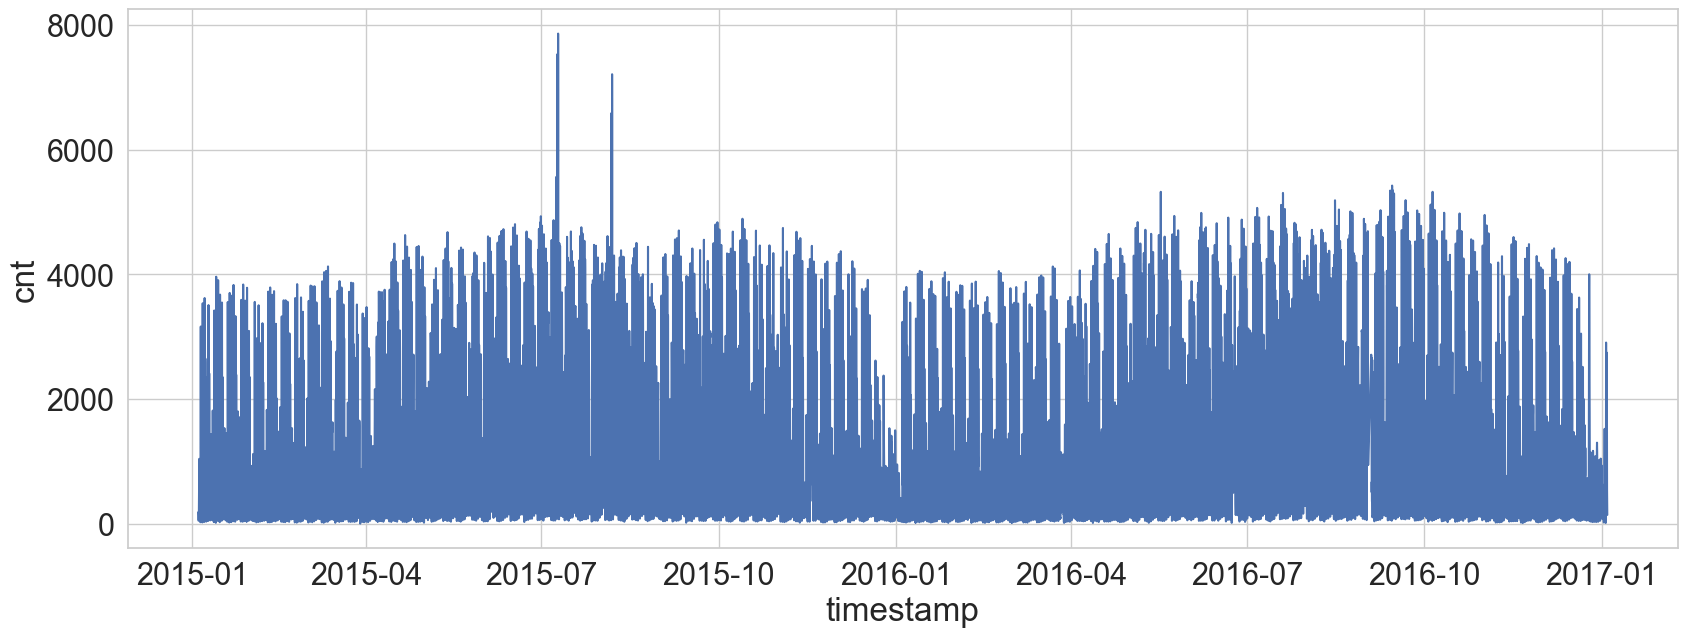

In [8]:
sns.lineplot(x='timestamp', y='cnt', data=df)

Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды

# Задание 3
В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [9]:
#сортируем по дням
df.sort_values(by='timestamp', inplace=True)
df.set_index('timestamp', drop=False, inplace=True)

In [10]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


<Axes: xlabel='timestamp'>

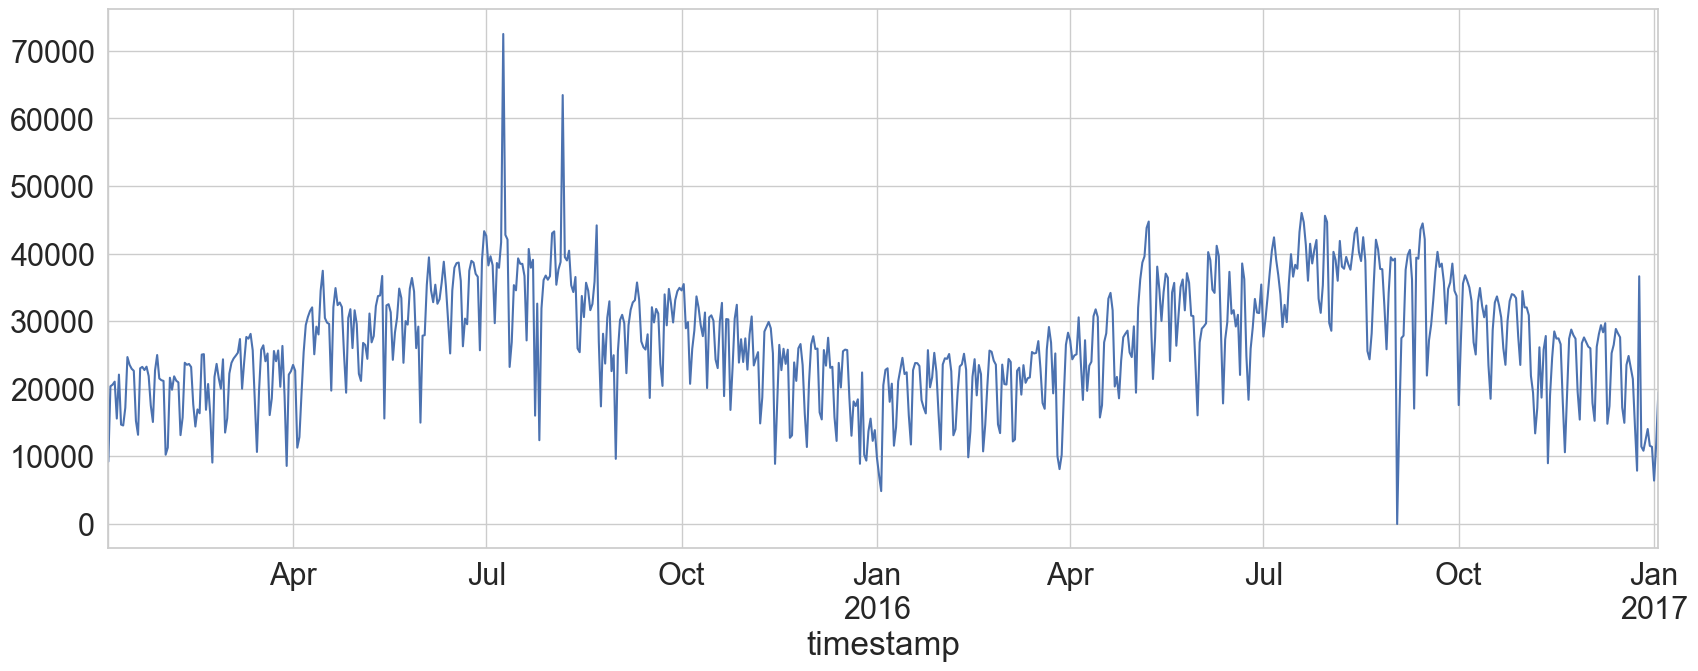

In [11]:
df.resample(rule='D').cnt.sum().plot()

**Выводы:**
1. Встречаются как очень резкие скачки числа аренд, так и падения
2. Максимальное число аренд за день составляет более 70 000
3. Зимой число аренд меньше, чем летом

# Задание 4
Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в те дни - и насколько эти изменения для нас неожиданны 🤔. Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией, и на отдельные из них мы потом и посмотрим.

Однако не всё так просто. Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. Для этого разделим дальнейшие действия на несколько этапов:

1. сначала посчитаем скользящее среднее, чтобы сгладить ряд
2. далее – разницу между наблюдаемыми и сглаженными значениями
3. определим верхние и нижние границы 99% доверительного интервала 
4. найдем причины аномалий!
На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. 

В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [12]:
df_by_day = df.resample(rule='D').cnt.sum().reset_index()
df_by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [13]:
#скользящее среднее
df_by_day_roll = df.resample(rule='D').cnt.sum().rolling(window=3).mean().reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


<Axes: >

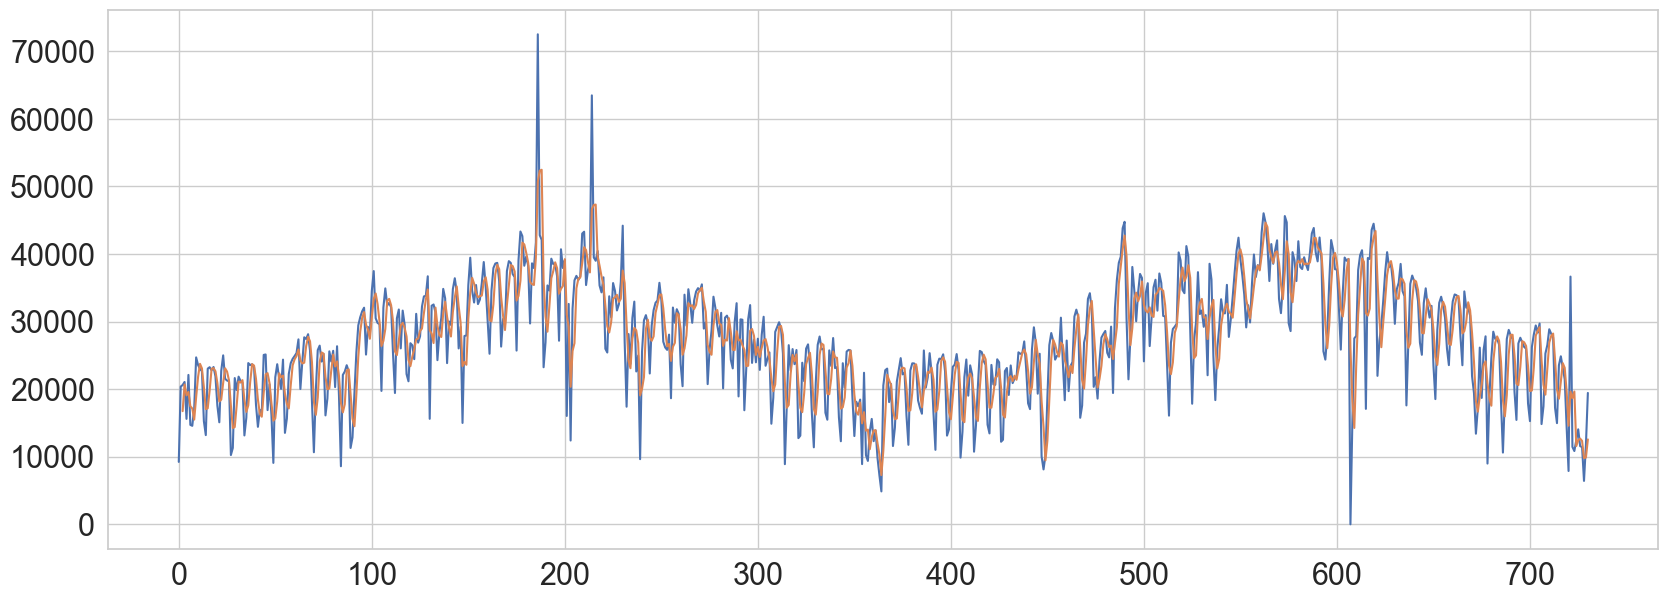

In [14]:
df_by_day.cnt.plot()
df_by_day_roll.cnt.plot()


В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [15]:
df_by_day_roll.query("timestamp == '2015-07-09'")

,timestamp,cnt
186,2015-07-09,50705.0


# Задание 5

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. 

Берем скользящее стреднее и реальные данные. если данные будут слишком отклоняться от среднего, то можно сделать вывод, что это аномалии 

In [16]:
round(np.std(df_by_day['cnt'] - df_by_day_roll['cnt']), 2)

4558.59

In [17]:
#для дальнейших расчетов
std = np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])

In [18]:
std

4558.58664111794

# Задание 6

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

- upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [19]:
upper_bound = df_by_day_roll.cnt + (2.576 * std)
lower_bound = df_by_day_roll.cnt - (2.576 * std)

In [20]:
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound
df_by_day

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,11566,24424.919188,939.080812
727,2016-12-31,11424,24090.252521,604.414146
728,2017-01-01,6421,21546.585854,-1939.252521
729,2017-01-02,11823,21632.252521,-1853.585854


### Ответ


In [21]:
round(upper_bound.loc[730], 2)

24302.92

# Задание 7
И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [22]:
anomal = df_by_day[df_by_day.cnt > df_by_day.upper_bound]

In [23]:
anomal

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


### Ответ 

In [24]:
anomal[anomal.cnt == anomal.cnt.max()]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812


In [25]:
anomal[anomal.cnt == anomal.cnt.max()].timestamp

186   2015-07-09
Name: timestamp, dtype: datetime64[ns]